In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import mne

In [2]:
def plot_eeg(mne_raw,pick='all',ax=None):
    if ax==None:
        fig,ax=plt.subplots()
        show=True
    if pick=='all':
        pick = mne_raw.ch_names
    for ch in pick:
        ax.plot(mne_raw.times,mne_raw.get_data(picks=ch).flatten(),label=ch)
    plt.legend()
    if show==True:
        plt.show()
    return

In [3]:
df = pd.read_csv('./dogos-quest-main/quest_eeg/060924-1700/Explore_84CF_ExG_ExG_stream_3.csv')
ts = np.array(df["Timestamps"])

mrk = pd.read_csv('./dogos-quest-main/quest_eeg/060924-1700/Explore_84CF_Marker_Markers_stream_1.csv')
num_events = len(mrk)
seg_len = 5

##Assuming the channels are in the order Fz, Cz, T3, T4, P3, P4, Fp1, Fp2
fz = np.array(df["Ch_1"])
cz = np.array(df["Ch_2"])
t3 = np.array(df["Ch_3"])
t4 = np.array(df["Ch_4"])
p3 = np.array(df["Ch_5"])
p4 = np.array(df["Ch_6"])

raw_np = np.array([fz,cz,t3,t4,p3,p4])/1000 #mne stores data in volts
ch_names = ['Fz','Cz','T3','T4','P3','P4']

In [4]:
sfreq = 1000
info = mne.create_info(ch_names,ch_types=['eeg']*len(ch_names),sfreq=sfreq,verbose=False)
raw = mne.io.RawArray(raw_np,info) 
raw.set_meas_date(ts[0])

annot = mne.Annotations(
    onset=mrk["Timestamps"].to_numpy()-ts[0],
    duration=[seg_len]*num_events,
    description=mrk["Ch_1"].to_list(),
    orig_time = ts[0])
raw.set_annotations(annot,verbose=False)


Creating RawArray with float64 data, n_channels=6, n_times=366512
    Range : 0 ... 366511 =      0.000 ...   366.511 secs
Ready.


<RawArray | 6 x 366512 (366.5 s), ~16.8 MB, data loaded>

<IPython.core.display.Javascript object>


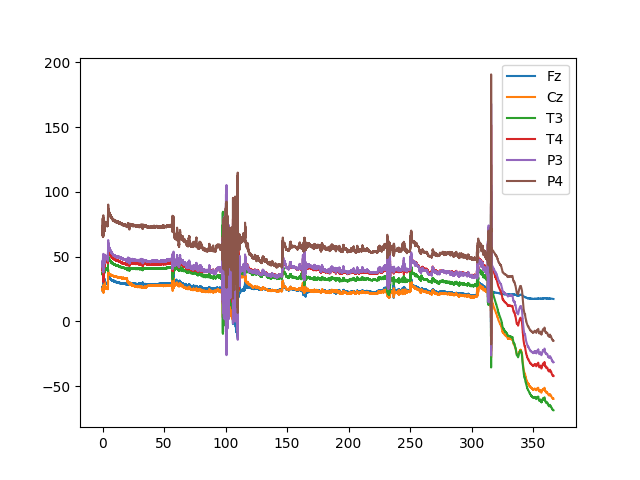

In [5]:
plot_eeg(raw)

/tmp/ipykernel_183536/1200427561.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(picks='all',verbose=False).plot()


<IPython.core.display.Javascript object>


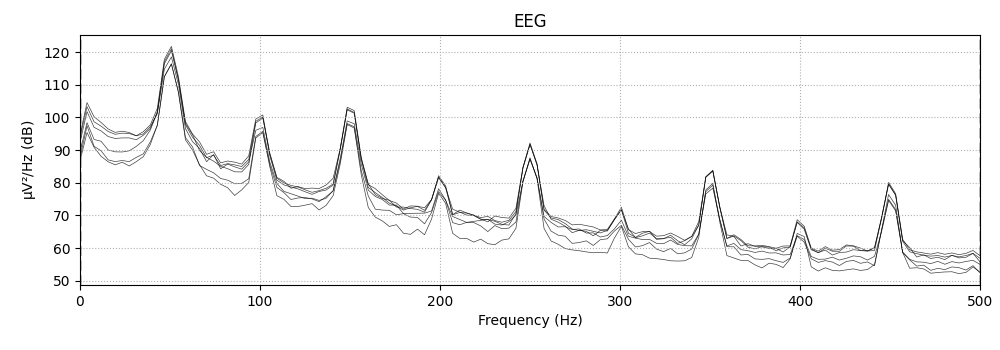

<IPython.core.display.Javascript object>


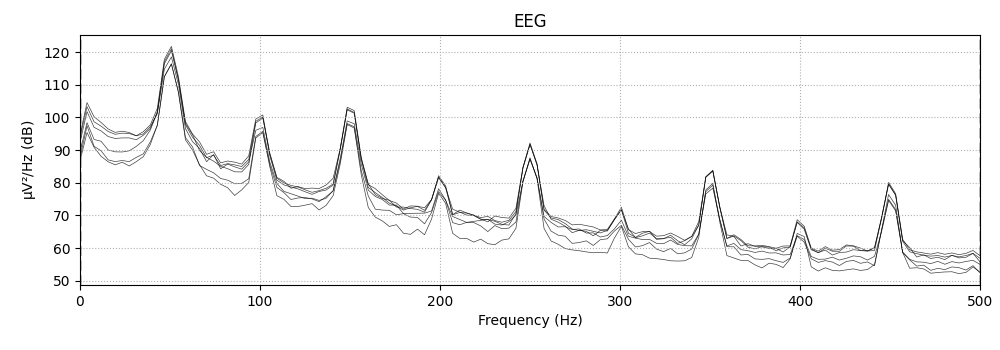

In [6]:
raw.compute_psd(picks='all',verbose=False).plot()

In [7]:
raw.crop(tmax=301)
raw.notch_filter(np.arange(50, 500, 50))

# raw.set_eeg_reference(ref_channels='average')
# raw.filter(0.1,45)
# raw = raw.resample(sfreq=250,verbose=False)


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished


<RawArray | 6 x 301001 (301.0 s), ~13.8 MB, data loaded>

/tmp/ipykernel_183536/1200427561.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(picks='all',verbose=False).plot()


<IPython.core.display.Javascript object>


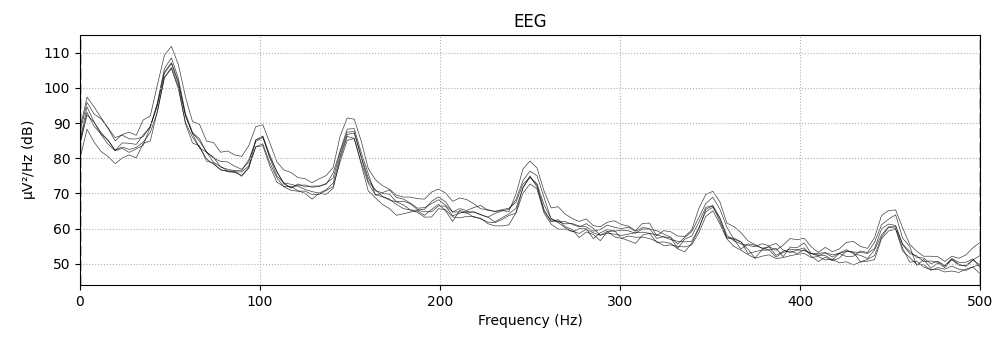

<IPython.core.display.Javascript object>


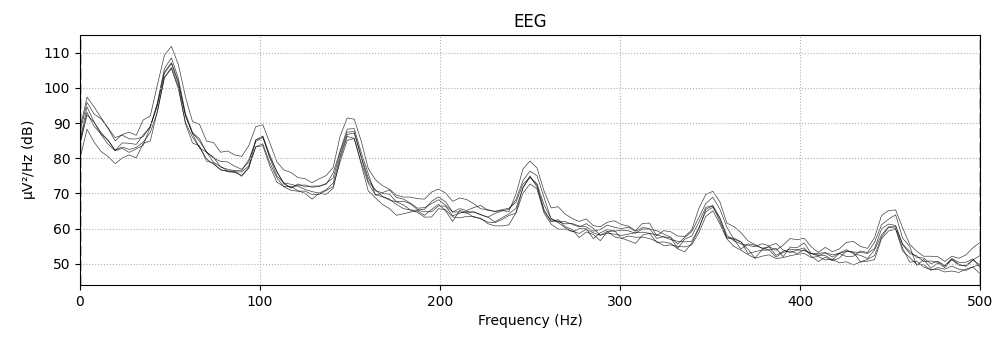

In [8]:
raw.compute_psd(picks='all',verbose=False).plot()

In [ ]:
plot_eeg(raw)

In [ ]:
raw.compute_psd(picks='all',verbose=False).plot()

In [ ]:
# np.shape(raw.get_data())
# np.shape(raw_np)
# 366512/4

# print(annot.onset)

# for idx,onset in enumerate(annot.onset):
#     annot.onset[idx] = ts[np.where(ts-ts[0]-onset<0)[0][-1]]
# print(annot.onset)

# idx = np.where(np.floor(annot.onset[0])==np.floor(ts))[0][0]
# ts[idx+980]
# annot.onset[0]

# ts[19506]-annot.onset[0]
# ts[np.where(ts-annot.onset[1]<0)[0][-1]]
